In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e211160>,
      dtype=object)

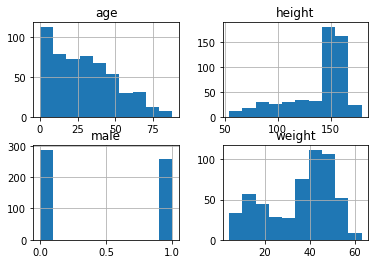

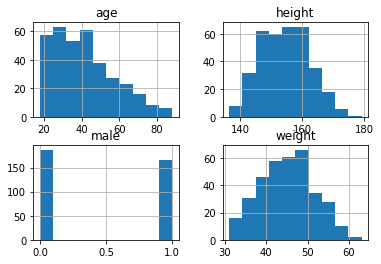

In [4]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2=d[d["age"]>=18]
d.hist()
d2.hist()

# Model #

In [10]:
with pm.Model() as deterministicHeightweight:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * (d2.weight-d2.weight.mean())#f(x)=a+b*w
    # height =a+ b* weight+ N(0,Sigma)
    
    mu = pm.Deterministic('mu', alpha + beta * (d2.weight-d2.weight.mean()))
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    postriorprobgirdilike = pm.sample(1000, tune=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 3_000 tune and 1_000 draw iterations (6_000 + 2_000 draws total) took 20 seconds.


# prior predictive checks #

In [19]:
with deterministicHeightweight:
     prior = pm.sample_prior_predictive(5000)
prior        
        

{'sigma': array([36.38611656, 10.60515982, 36.49806396, ..., 11.43494473,
        18.97985705,  4.92751182]),
 'sigma_interval__': array([ 0.98309718, -1.31229419,  0.99442613, ..., -1.21567257,
        -0.4912585 , -2.21343788]),
 'height': array([[ 1.92225726e+02,  2.54711756e+02,  2.60325663e+02, ...,
          2.05586677e+02,  2.21413254e+02,  1.94050553e+02],
        [ 3.33928704e+02,  2.03087369e+02,  1.59411564e+02, ...,
          3.95623013e+02,  4.02070597e+02,  4.01295696e+02],
        [ 3.10102940e+02,  5.39641372e+02,  6.06134903e+02, ...,
          2.90492897e+02,  3.29016332e+02,  3.36440580e+02],
        ...,
        [ 1.71287147e+02,  7.04170074e+01,  5.27607151e+01, ...,
          1.66470987e+02,  1.98927264e+02,  1.64126566e+02],
        [ 2.59118096e+02,  4.54444319e-01, -5.91965176e+01, ...,
          3.15709174e+02,  4.03443165e+02,  3.03381280e+02],
        [ 8.24366157e+01,  1.17240232e+02,  1.24900984e+02, ...,
          6.10017895e+01,  5.95651918e+01,  7.01103

# With prior predictive you can draw a) histograms 
#

(array([485., 476., 474., 532., 486., 500., 488., 535., 496., 528.]),
 array([8.41945190e-04, 4.99857029e+00, 9.99629863e+00, 1.49940270e+01,
        1.99917553e+01, 2.49894837e+01, 2.99872120e+01, 3.49849403e+01,
        3.99826687e+01, 4.49803970e+01, 4.99781254e+01]),
 <a list of 10 Patch objects>)

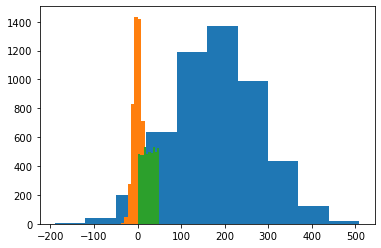

In [27]:
plt.hist(prior['alpha'].flatten())
plt.hist(prior['beta'].flatten())
plt.hist(prior['sigma'].flatten())


(array([8.00000e+00, 2.71000e+02, 9.33500e+03, 1.23364e+05, 6.62547e+05,
        7.64491e+05, 1.87173e+05, 1.22130e+04, 5.84000e+02, 1.40000e+01]),
 array([-593.20787592, -441.12413767, -289.04039943, -136.95666119,
          15.12707706,  167.2108153 ,  319.29455354,  471.37829179,
         623.46203003,  775.54576827,  927.62950652]),
 <a list of 10 Patch objects>)

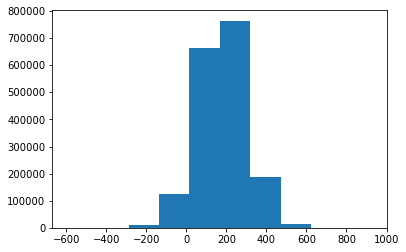

In [28]:
plt.hist(prior["mu"].flatten())

(array([2.50000e+01, 8.14000e+02, 1.90810e+04, 2.10101e+05, 7.61821e+05,
        6.35063e+05, 1.24921e+05, 7.81300e+03, 3.49000e+02, 1.20000e+01]),
 array([-560.25264456, -408.21888534, -256.18512611, -104.15136689,
          47.88239233,  199.91615155,  351.94991077,  503.98366999,
         656.01742922,  808.05118844,  960.08494766]),
 <a list of 10 Patch objects>)

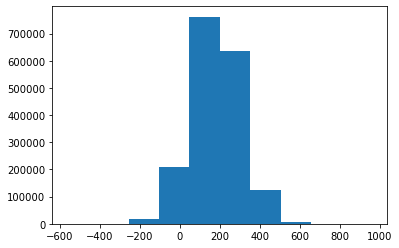

In [29]:
plt.hist(prior["height"].flatten())

# or b) do a sanity check #

In [61]:
prior["height"].std(0)

(352,)

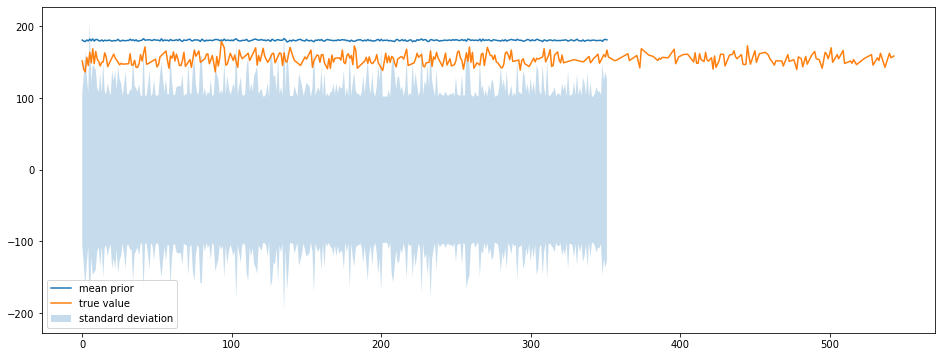

In [62]:
 # Sample from the prior and check of the model is well defined.
y = prior["height"]
plt.figure(figsize=(16, 6))
plt.plot(y.mean(0), label='mean prior')#plot mean of ech  h0 t0 h352 
plt.fill_between(np.arange(y.shape[1]), -y.std(0), y.std(0), alpha=0.25, label='standard deviation')
plt.plot(d2['height'], label='true value')
plt.legend()



In [66]:
hpdvals=az.hpd(prior["height"])
hpdvals=hpdvals.T # why becausye of the way fil between works


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (5000) than draws (352). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


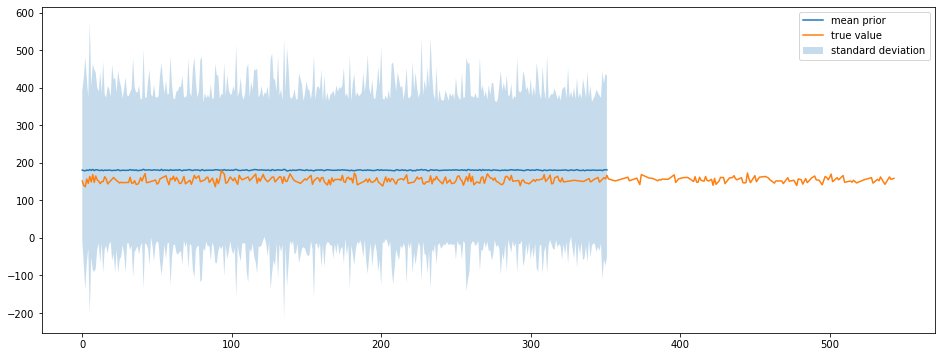

In [68]:
y = prior["height"]
plt.figure(figsize=(16, 6))
plt.plot(y.mean(0), label='mean prior')#plot mean of ech  h0 t0 h352 
plt.fill_between(np.arange(y.shape[1]), hpdvals[0],hpdvals[1], alpha=0.25, label='standard deviation')
plt.plot(d2['height'], label='true value')
plt.legend()

# posterior check#

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12874b1f0>,
      dtype=object)

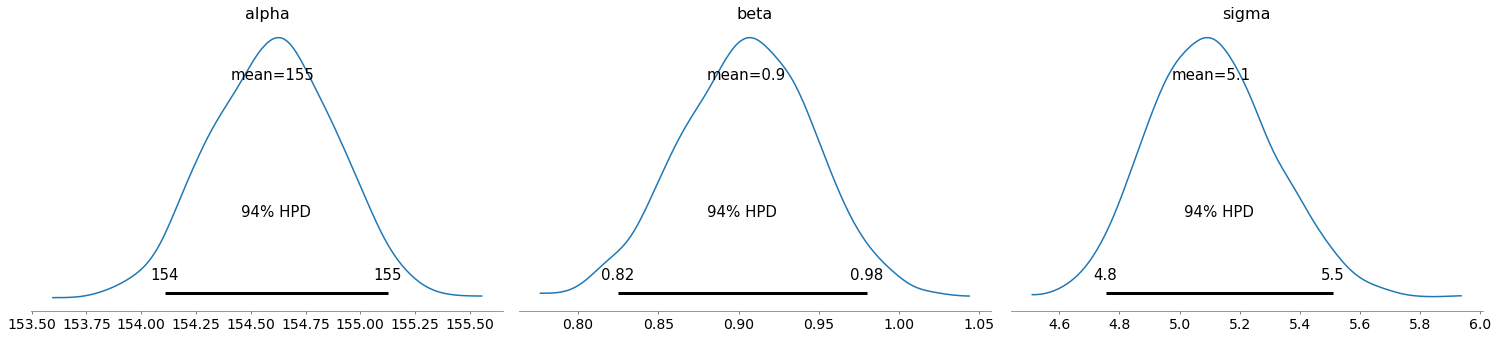

In [69]:
az.plot_posterior(postriorprobgirdilike ,var_names=['alpha','beta','sigma'])

# prediction for one value mu at 50 kgs"

In [81]:
mu_at_50 = postriorprobgirdilike["alpha"] + postriorprobgirdilike["beta"] * (50 - d2.weight.mean())
mu_at_50.shape

(2000,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122204970>],
      dtype=object)

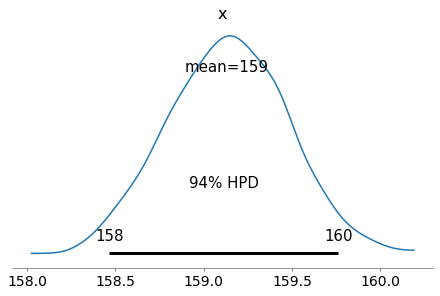

In [80]:
az.plot_posterior(mu_at_50)


In [91]:
postriorprobgirdilike["mu"]

array([[157.43036971, 146.7473346 , 142.39399779, ..., 161.51663065,
        163.30603903, 161.86382929],
       [156.84985897, 147.12494829, 143.16204718, ..., 160.5696373 ,
        162.19855984, 160.8856969 ],
       [156.88597709, 146.72352263, 142.58232244, ..., 160.77311592,
        162.47532705, 161.10339569],
       ...,
       [157.34031587, 146.75387648, 142.43990243, ..., 161.38962894,
        163.16285754, 161.73368822],
       [157.26663788, 146.94480957, 142.73866453, ..., 161.21473721,
        162.94364345, 161.55019663],
       [157.08170581, 147.1244171 , 143.06682195, ..., 160.89036874,
        162.5582146 , 161.21398063]])

In [89]:
mu_hpd = pm.hpd(postriorprobgirdilike["mu"])

In [93]:
mu_hpd.shape # boundaries for m0,m1,....

(352, 2)

In [94]:
#mean vals for each mu
mu_mean=postriorprobgirdilike["mu"].mean(axis=0)


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (2000) than draws (352). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


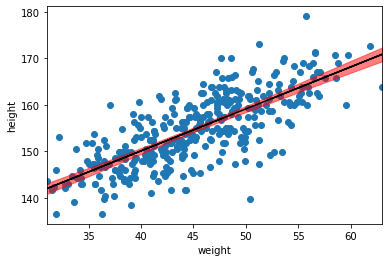

In [117]:
plt.scatter(d2.weight, d2.height)
#plt.plot(d2.weight, postriorprobgirdilike["mu"].T, "k",color="yellow")#all the possible lines
plt.plot(d2.weight, mu_mean, "k",color="black")
az.plot_hpd(d2.weight,postriorprobgirdilike["mu"],color="red")#lines with  95 hpd interval
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

# Prediction intervals #

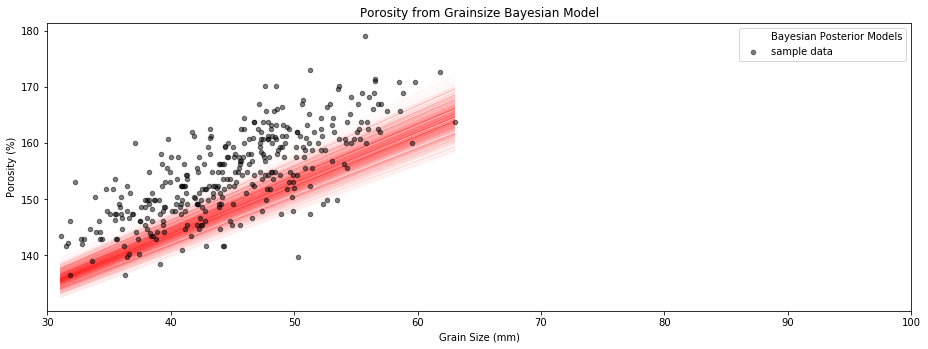